# Generate figure of taxonomy

In [325]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, fcluster, set_link_color_palette

In [326]:
cdata = pd.read_parquet('cdata.parquet')

In [329]:
norm = cdata / cdata.max()

In [335]:
norm

,sdbAre,sdbPer,sdbCoA,ssbCCo,ssbSqu,ssbERI,ssbElo,libNCo,ldbPWL,ltcBuA,mtbAli,mtbNDi,ltbIBD,stbSAl,sdsLen,sssLin,ldsMSL,ldsRea,ldsAre,sisBpM,sdsSPW,sdsSPO,sdsSWD,lcdMes,linP3W,linP4W,linPDE,lcnClo,lddNDe,linWID,ldsCDL,xcnSCl,mtdMDi,sddAre,midRea,midAre,sdcLAL,sdcAre,sscCCo,sscERI,mtcWNe,mdcAre,ltcWRB,sicCAR,sdsAre,mibCou,mibAre,mibLen,mibElo,mibERI,mibCCo,mibLAL,mibFR,mibSCo,micBAD,midBAD,limLPS,limAre
level_5_label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.600120,0.659196,0.0,0.424946,0.003988,0.888952,0.459893,0.000000,0.094513,0.894444,0.295645,0.764460,0.712288,0.165100,0.104137,0.993886,0.180358,0.173228,0.109586,0.000841,0.682759,0.718246,0.692265,0.578776,0.952381,0.513622,0.137931,0.196753,0.010289,0.463845,0.179929,0.000000,0.128315,0.065853,0.124481,0.084280,0.837419,0.835176,0.831261,0.964999,0.274514,0.782780,0.142855,0.292306,0.057396,0.015152,0.042500,0.054095,0.451341,0.841832,0.374442,0.183607,0.570520,0.570520,0.205645,0.144461,1.0,0.219947
2,0.229092,0.375708,0.0,0.525638,0.003125,0.891249,0.594653,0.000000,0.076519,0.750000,0.292649,0.486311,0.496016,0.166607,0.097823,0.993404,0.175954,0.271422,0.100201,0.001606,0.588056,0.628348,0.803946,0.569463,0.964321,0.485294,0.142857,0.211839,0.010423,0.465913,0.185141,0.000000,0.120009,0.055569,0.211618,0.075135,0.518347,0.307327,0.804478,0.961263,0.431927,0.358486,0.213876,0.325799,0.048823,0.030303,0.029548,0.043842,0.550842,0.815221,0.426114,0.140995,0.491132,0.491132,0.121735,0.102964,1.0,0.157391
3,0.384038,0.519410,0.0,0.499147,0.002136,0.891792,0.534431,0.000000,0.163720,0.692308,0.154178,0.582246,0.649997,0.197590,0.222550,0.986565,0.323663,0.315887,0.266747,0.001249,0.707505,0.830843,0.746669,0.501587,0.957265,0.465882,0.148936,0.065089,0.006365,0.276123,0.336370,0.000000,0.267640,0.248635,0.261411,0.247871,0.750918,0.601580,0.802879,0.961468,0.282873,1.000000,0.061571,0.342758,0.232854,0.045455,0.129803,0.093999,0.583068,0.797908,0.464157,0.289751,1.000000,1.000000,1.000000,1.000000,0.0,1.000000
4,0.147906,0.297570,0.0,0.547898,0.002540,0.891703,0.648516,0.000000,0.053786,0.777778,0.317113,0.466458,0.513636,0.206056,0.121037,0.987887,0.220333,0.280686,0.122985,0.001687,0.574172,0.685530,0.870668,0.467529,0.969697,0.388235,0.157895,0.172915,0.008569,0.363411,0.231050,0.000000,0.143378,0.075290,0.228216,0.096215,0.500771,0.275557,0.782925,0.956583,0.439062,0.377252,0.167864,0.260305,0.067001,0.030303,0.016012,0.030633,0.644668,0.827030,0.493998,0.095314,0.384534,0.384534,0.082730,0.103593,0.0,0.273415
5,0.273980,0.426816,0.0,0.521511,0.002209,0.891854,0.574733,0.000000,0.087869,0.777778,0.256160,0.610088,0.654337,0.203725,0.167928,0.987523,0.278303,0.282538,0.194244,0.001219,0.676872,0.796935,0.798652,0.462529,0.959064,0.441176,0.156250,0.125099,0.007132,0.304404,0.302422,0.000000,0.200570,0.142422,0.224066,0.164673,0.700761,0.536829,0.798464,0.959144,0.312204,0.730693,0.099756,0.266094,0.126951,0.030303,0.040462,0.050314,0.592603,0.832118,0.472697,0.161884,0.589862,0.589862,0.354764,0.358659,0.0,0.521482
6,0.152214,0.296478,0.0,0.553128,0.002691,0.892051,0.627601,0.000000,0.035872,1.000000,0.265761,0.744900,0.754216,0.290787,1.000000,0.960865,1.000000,1.000000,1.000000,0.001291,0.640341,0.920349,0.934423,0.446959,0.962963,0.345098,0.176471,0.065531,0.002225,0.092763,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.754422,0.604663,0.813853,0.960686,0.281674,0.567979,0.107235,0.099231,1.000000,0.015152,0.008699,0.020255,0.633674,0.893882,0.534075,0.064591,0.319044,0.319044,0.024881,0.034219,1.0,0.026785
7,0.147078,0.291990,0.0,0.549975,0.002969,0.892030,0.617370,0.000000,0.037571,0.904545,0.243904,0.504190,0.510144,0.284213,0.670433,0.970324,0.828580,0.713293,0.522786,0.001480,0.590737,0.866910,0.952044,0.441615,0.965517,0.316927,0.186047,0.108047,0.002608,0.107487,0.871931,0.000000,0.699573,0.466434,0.668050,0.484972,0.502200,0.302832,0.829047,0.963495,0.421731,0.287427,0.173617,0.180753,0.435648,0.015152,0.009318,0.021233,0.615740,

Metadata

In [22]:
v = 'v10'
lower_cut = 500  # the lowest level shown in tree - matched to labels in pmtiles
higher_cut = 1000  # level at which colors are assigned

Read linkage matrix.

In [23]:
linkage_matrix = np.load(f'/data/uscuni-ulce/processed_data/clusters/complete_linkage_10_{v}.npy')

Code for circular dendrogram.

In [ ]:
def smoothsegment(seg, Nsmooth=100):
    return np.concatenate([[seg[0]], np.linspace(seg[1], seg[2], Nsmooth), [seg[3]]])

def smoothline(seg, Nsmooth=100):
    return np.concatenate([[seg[0]], np.linspace(seg[1], seg[2], Nsmooth), [seg[3]]])

In [25]:
low = fcluster(linkage_matrix, lower_cut, criterion='distance')
high = fcluster(linkage_matrix, higher_cut, criterion='distance')

In [297]:
colors = [
    "#4069BC",
    "#7CBAE4",
    "#E69C63",
    "#eec1d5",
    "#e6639d",
    "#E0665F",
    "#b2cd32",
    "#ECBF43",]
set_link_color_palette(colors)

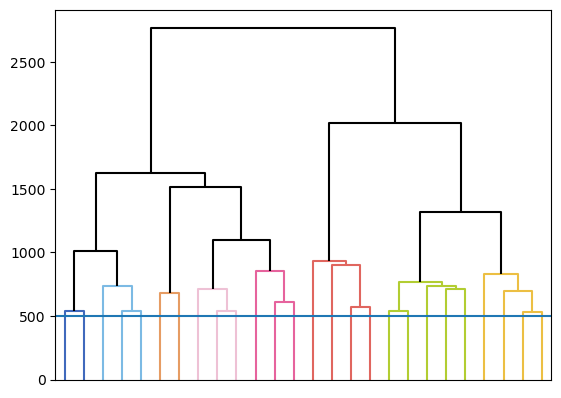

In [298]:
d = dendrogram(linkage_matrix , no_plot=False, truncate_mode='lastp', p=26, color_threshold=higher_cut, no_labels=True, above_threshold_color="k")
plt.axhline(500)

In [299]:
np.unique(fcluster(linkage_matrix, 500, criterion='distance')).shape

(26,)

In [300]:
icoord = np.array(d['icoord'])
dcoord = np.array(d['dcoord'])
gap = 0.043

dcoord = -dcoord
# avoid a wedge over the radial labels
imax = icoord.max()
imin = icoord.min()
icoord = ((icoord - imin)/(imax - imin)*(1-gap) + gap/2)*2*np.pi

In [301]:
from matplotlib.cm import Blues, Spectral, Reds, Greens, viridis
from momepy.datasets import get_path
import geopandas as gpd
from mpl_toolkits.axes_grid1 import inset_locator

In [302]:
blg = gpd.read_file(get_path('bubenec'), layer='buildings')

In [321]:
abundacne = np.array([2060,
 18992,
 685,
 5328,
 5347,
 6052,
 21252,
 10336,
 26454,
 28294,
 4,
 22834,
 69598,
 3,
 535,
 1833,
 7636,
 29677,
 43803,
 67101,
 7607,
 100055,
 56,
 15962,
 10424,
 17331])

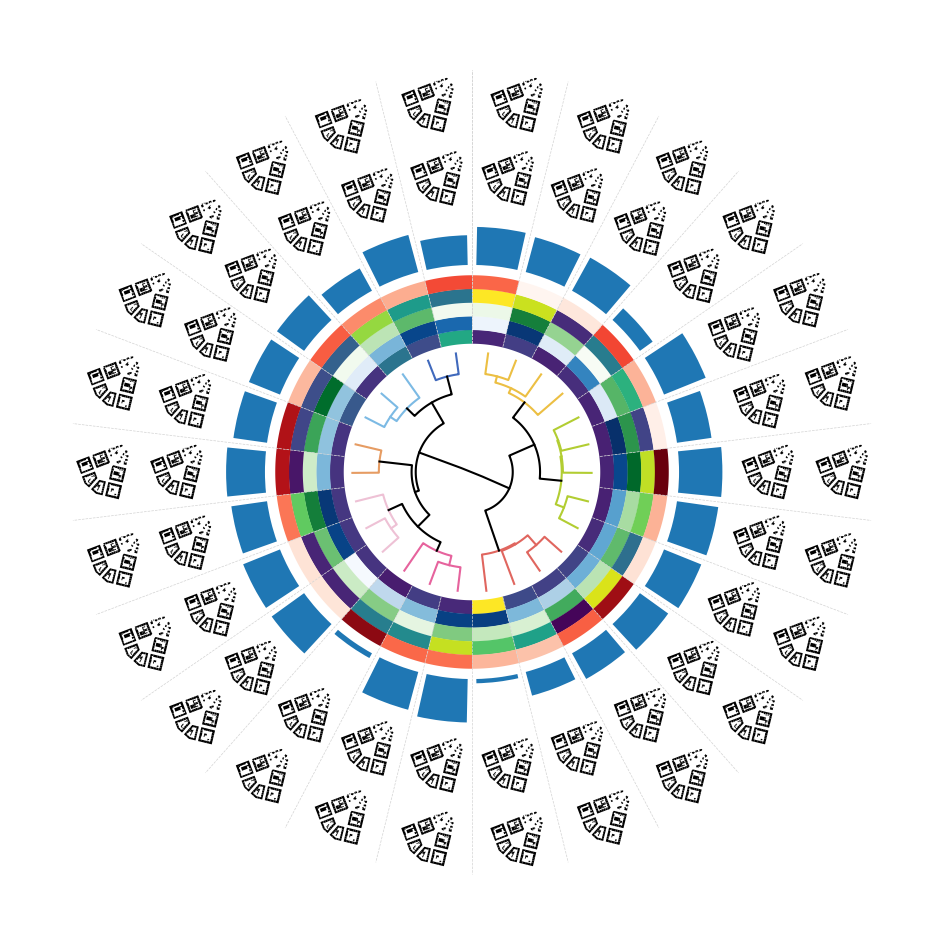

In [334]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, polar=True)

for xs, ys, color in zip(icoord[:-1], dcoord[:-1], d['color_list'][:-1]):
    xs = smoothsegment(xs)
    ys = smoothsegment(ys)
    ax.plot(xs,ys, color=color)


ax.plot(icoord[-1], dcoord[-1], color=d['color_list'][-1])

ax.spines['polar'].set_visible(False)
ax.set_rlabel_position(0)
Nxticks = 10
xticks = np.linspace(gap/2, 1-gap/2, Nxticks)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])

ax.grid(False, axis='x')
ax.set_theta_zero_location("N")

line_len = np.pi * 2 / 26

# morphometric values
linewidth = 10
start_y = 400
offset = linewidth * 35
start = 0
for i in range(26):
    ax.plot(np.linspace(start, start + line_len, 100), [start_y] * 100, color=viridis(norm.sdbAre[i + 1]), linewidth=linewidth, alpha=1, solid_capstyle='butt')
    ax.plot(np.linspace(start, start + line_len, 100), [start_y + offset] * 100, color=Blues(np.random.rand()), linewidth=linewidth, alpha=1, solid_capstyle='butt')
    ax.plot(np.linspace(start, start + line_len, 100), [start_y + offset * 2] * 100, color=Greens(np.random.rand()), linewidth=linewidth, alpha=1, solid_capstyle='butt')
    ax.plot(np.linspace(start, start + line_len, 100), [start_y + offset * 3] * 100, color=viridis(np.random.rand()), linewidth=linewidth, alpha=1, solid_capstyle='butt')
    ax.plot(np.linspace(start, start + line_len, 100), [start_y + offset * 4] * 100, color=Reds(np.random.rand()), linewidth=linewidth, alpha=1, solid_capstyle='butt')
    start += line_len

ax.bar(np.linspace(line_len / 2, np.pi * 2 - line_len / 2, 26), np.log(abundacne) * 100, bottom=2000, width = .2)

# morphotopes
# Create 26 inset axes arranged in a circle
for i in range(26):
    angle = (i * 2 * np.pi / 26) + ((np.pi / 26))
    # Calculate position for each inset axis around the circle
    x_pos = 0.5 + 0.32 * np.cos(angle - np.pi/2)  # -np.pi/2 to start at top
    y_pos = 0.5 + 0.32 * np.sin(angle - np.pi/2)

    inset = ax.inset_axes([x_pos - 0.0325, y_pos - 0.0325, .065, .065])
    blg.plot(ax=inset, color='k')
    inset.set_axis_off()

    # Calculate position for each inset axis around the circle
    x_pos = 0.5 + 0.40 * np.cos(angle - np.pi/2)  # -np.pi/2 to start at top
    y_pos = 0.5 + 0.40 * np.sin(angle - np.pi/2)

    inset = ax.inset_axes([x_pos - 0.0325, y_pos - 0.0325, .065, .065])
    blg.plot(ax=inset, color='k')
    inset.set_axis_off()


for x in np.linspace(0, 2 * np.pi, 27):
    ax.plot([x,x], [0, 7000, ], color='lightgray',linewidth=.5, linestyle="--")

# fix the extent
ax.plot([0, 0], [0, 8000, ], color='none',linewidth=.5, linestyle="--")
ax.plot([np.pi / 2, np.pi / 2], [0, 8000, ], color='none',linewidth=.5, linestyle="--")
ax.plot([np.pi * 1.5, np.pi* 1.5], [0, 8000, ], color='none',linewidth=.5, linestyle="--")
ax.plot([np.pi, np.pi], [0, 8000, ], color='none',linewidth=.5, linestyle="--")